<a href="https://colab.research.google.com/github/Ka275578/telecom_churn_analysis/blob/main/telecom_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading CSV File From Drive and storing in dataframe**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/capstone_project/Telecom Churn.csv')

**EXPLORING DATASET**

In [4]:
#Shape of the Dataframe
df.shape

(3333, 20)

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [11]:
#list of columns we have
list(df.columns)

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

**VARIABLE BREAKDOWN**

**STATE:** States in United States of America

**AREA CODE:** Code of area

**INTERNATIONAL PLAN:** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**VOICE MAIL PLAN:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**TOTAL DAY MINUTES:** Total Number of Minutes Spent By Customers in Morning

**TOTAL DAY CALLS:** Total Number of Calls made by Customer in Morning.

**TOTAL DAY CHARGE:** Total Charge to the Customers in Morning.

**TOTAL EVE MINUTES:** Total Number of Minutes Spent By Customers in Evening

**TOTAL EVE CALLS:** Total Number of Calls made by Customer in Evening.

**TOTAL EVE CHARGE:** Total Charge to the Customers in Morning.

**TOTAL NIGHT MINUTES:** Total Number of Minutes Spent By Customers in the Night.

**TOTAL NIGHT CALLS:** Total Number of Calls made by Customer in Night.

**TOTAL NIGHT CHARGE:** Total Charge to the Customers in Night.

**TOTAL INTL MINUTES:** Total Number of Minutes Spent By Customers for international calls

**TOTAL INTL CALLS:** Total Number of International Calls made by customer

**TOTAL INTL CHARGE:** Total charge to customers for international calls

In [27]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [20]:
df.isnull().sum()
# we see that we have no null values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [28]:
#total number of states in united states
len(df['State'].unique())


51

In [32]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

From the above observation we see that there are only three unique area codes 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland and San Francisco has more customers compared to other two cities.

In [38]:
#Dropping Account length as this data is irrelevant
df.drop('Account length', axis = 1)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**Churn rate percentage pie chart**

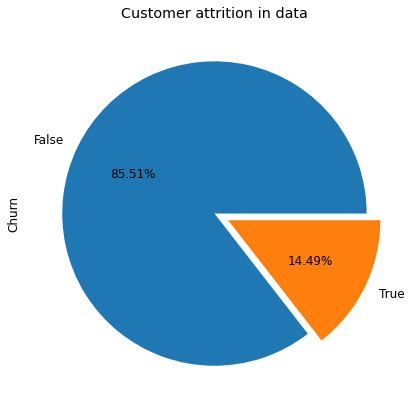

In [53]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (7,7))
my_explode = [0,0.1]
df['Churn'].value_counts().plot.pie(autopct = '%1.2f%%', explode = my_explode)
plt.title('Customer attrition in data')
plt.show()

In [62]:
df.groupby(['Churn'])['State'].count()

Churn
False    2850
True      483
Name: State, dtype: int64

So 2850 users out of 333 are loyal

**Stateswise Churn**

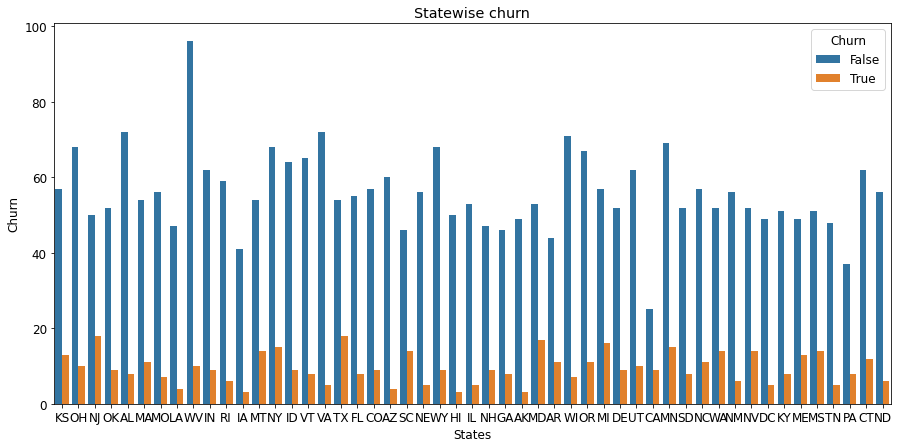

In [71]:
plt.figure(figsize=(15,7))
plt.title('Statewise churn')
sns.countplot(x = 'State', hue = 'Churn', data = df)
plt.xlabel('States')
plt.ylabel('Churn')
#plt.xticks(rotation = 0)
plt.show()

As we see above States NJ, TX and MD has more churn rates and company should look into these states to decrese the churn rate.

In [79]:
#Replacing 'Yes' or 'No' with '1' or '0' respectively as integers
df['International plan'] = df['International plan'].replace('Yes',1).replace('No',0).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace('Yes',1).replace('No',0).astype(int)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**Churn w.r.t to voice mail messages**

In [90]:
df['Number vmail messages'].unique()
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

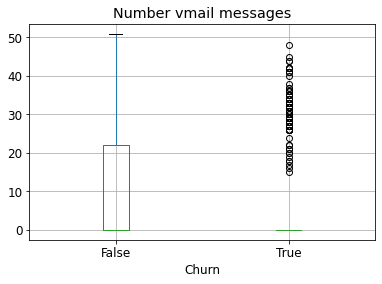

In [105]:

plt.show()
df.boxplot(column='Number vmail messages',  by='Churn')
plt.suptitle('')

We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature

**Churn w.r.t Total day minutes**

In [106]:
print('Maximum number of minutes:',df['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].max()/60))
print('Minimum number of minutes:',df['Total day minutes'].min())
print('Average number of minutes:',df['Total day minutes'].mean())

Maximum number of minutes: 350.8 i.e. Max number of Hours  spent: 6
Minimum number of minutes: 0.0
Average number of minutes: 179.77509750975094


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

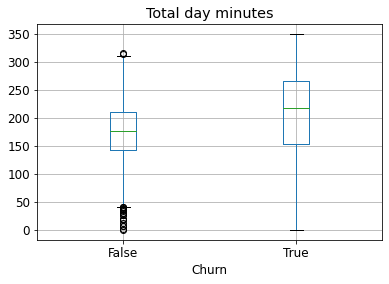

In [108]:
plt.show()
df.boxplot(column='Total day minutes',  by='Churn')
plt.suptitle('')

We can infer from above box-plot that with users spending more 225 minutes or more i.e. approx 4hrs tend to switch to other operator. So for long call time company should offer some discounts and upgrade the network

Similarly we can analyse with respect to other columns

**Churn w.r.t to number of day calls**

In [109]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 0
Average number of calls: 100.43564356435644


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

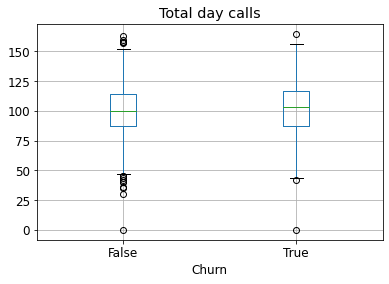

In [110]:
plt.show()
df.boxplot(column='Total day calls',  by='Churn')
plt.suptitle('')

**Churn w.r.t to day charge**

In [111]:
print('Maximum number of charge:',df['Total day charge'].max())
print('Minimum number of charge:',df['Total day charge'].min())
print('Average number of charge:',df['Total day charge'].mean())

Maximum number of charge: 59.64
Minimum number of charge: 0.0
Average number of charge: 30.562307230723075


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

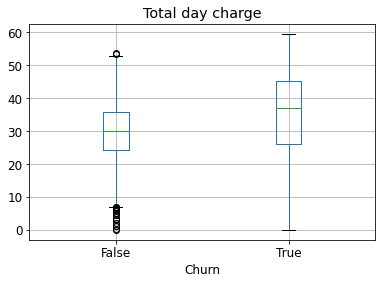

In [112]:
plt.show()
df.boxplot(column='Total day charge',  by='Churn')
plt.suptitle('')

As from above infered box-plot we can conclude one thing i.e Customers having more minutes spent on the network tend to leave the it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company.

**Churn w.r.t to  eve minutes**

In [114]:
print('Maximum number of minutes:',df['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total eve minutes'].max()/60))
print('Minimum number of minutes:',df['Total eve minutes'].min())
print('Average number of minutes:',df['Total eve minutes'].mean())

Maximum number of minutes: 363.7 i.e. Max number of Hours  spent: 6
Minimum number of minutes: 0.0
Average number of minutes: 200.98034803480348


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

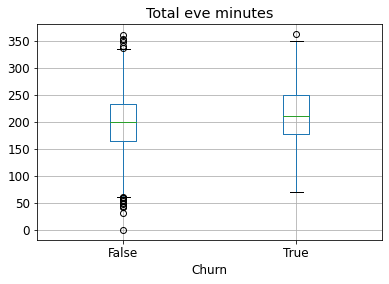

In [116]:
plt.show()
df.boxplot(column='Total eve minutes',  by='Churn')
plt.suptitle('')

**Churn w.r.t number of eve calls**

In [117]:
print('Maximum number of calls:',df['Total eve calls'].max())
print('Minimum number of calls:',df['Total eve calls'].min())
print('Average number of calls:',df['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.11431143114311


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

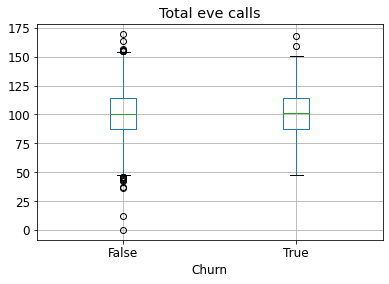

In [118]:
plt.show()
df.boxplot(column='Total eve calls',  by='Churn')
plt.suptitle('')

**Churn w.r.t evening charges**

In [119]:
print('Maximum number of charge:',df['Total eve charge'].max())
print('Minimum number of charge:',df['Total eve charge'].min())
print('Average number of charge:',df['Total eve charge'].mean())

Maximum number of charge: 30.91
Minimum number of charge: 0.0
Average number of charge: 17.083540354035403


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

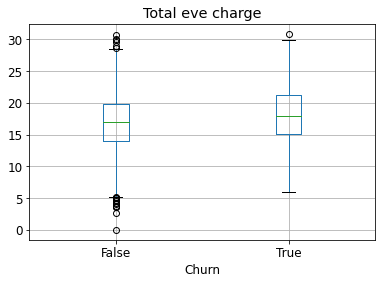

In [120]:
plt.show()
df.boxplot(column='Total eve charge',  by='Churn')
plt.suptitle('')

**Night time effecting churn rate**

**Churn w.r.t night minutes**

In [121]:
print('Maximum number of minutes:',df['Total night minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total night minutes'].max()/60))
print('Minimum number of minutes:',df['Total night minutes'].min())
print('Average number of minutes:',df['Total night minutes'].mean())

Maximum number of minutes: 395.0 i.e. Max number of Hours  spent: 7
Minimum number of minutes: 23.2
Average number of minutes: 200.87203720372037


In [122]:
#  One thing to notice above that minimum call duration in the night is 23.2 minutes in day or evening it was 0

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

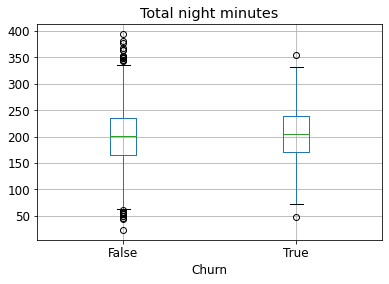

In [123]:
plt.show()
df.boxplot(column='Total night minutes',  by='Churn')
plt.suptitle('')

In night loyal customers spend more time calling

**Churn w.r.t to  night calls**

In [124]:
print('Maximum number of calls:',df['Total night calls'].max())
print('Minimum number of calls:',df['Total night calls'].min())
print('Average number of calls:',df['Total night calls'].mean())

Maximum number of calls: 175
Minimum number of calls: 33
Average number of calls: 100.10771077107711


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

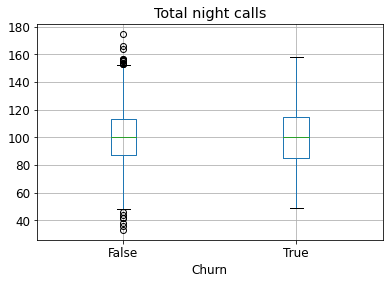

In [125]:
plt.show()
df.boxplot(column='Total night calls',  by='Churn')
plt.suptitle('')

The number of calls made by churned customer is more

**Churn with respect to night charge**

In [126]:
print('Maximum number of charge:',df['Total night charge'].max())
print('Minimum number of charge:',df['Total night charge'].min())
print('Average number of charge:',df['Total night charge'].mean())

Maximum number of charge: 17.77
Minimum number of charge: 1.04
Average number of charge: 9.03932493249325


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

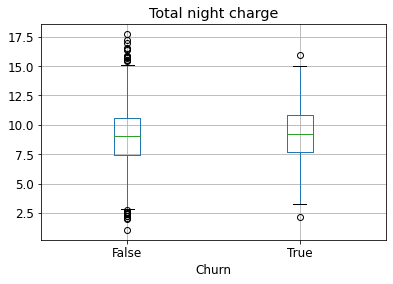

In [127]:
plt.show()
df.boxplot(column='Total night charge',  by='Churn')
plt.suptitle('')

Charge reduction required during night time

**International calls affecting churn Rates**

**Churn with respect to international call time**

In [128]:
print('Maximum number of minutes:',df['Total intl minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total intl minutes'].max()/60))
print('Minimum number of minutes:',df['Total intl minutes'].min())
print('Average number of minutes:',df['Total intl minutes'].mean())

Maximum number of minutes: 20.0 i.e. Max number of Hours  spent: 0
Minimum number of minutes: 0.0
Average number of minutes: 10.237293729372938


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

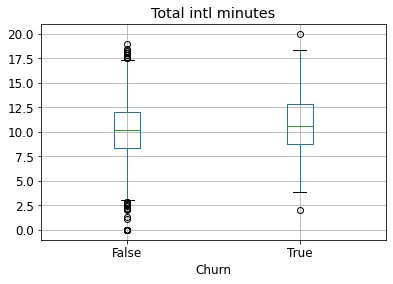

In [129]:
plt.show()
df.boxplot(column='Total intl minutes',  by='Churn')
plt.suptitle('')

**Churn with respect to no. of International calls**

In [132]:
print('Maximum number of calls:',df['Total intl calls'].max())
print('Minimum number of calls:',df['Total intl calls'].min())
print('Average number of calls:',df['Total intl calls'].mean())

Maximum number of calls: 20
Minimum number of calls: 0
Average number of calls: 4.4794479447944795


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

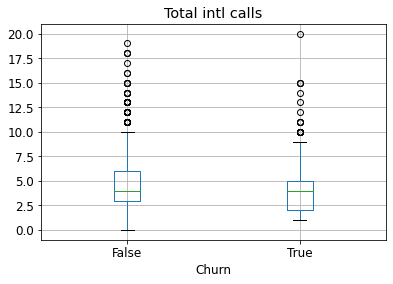

In [133]:
plt.show()
df.boxplot(column='Total intl calls',  by='Churn')
plt.suptitle('')

From the above we can see higher attrition of people making more number international calls without international packs

**Churn with respect to international charge**

In [130]:
print('Maximum number of charge:',df['Total intl charge'].max())
print('Minimum number of charge:',df['Total intl charge'].min())
print('Average number of charge:',df['Total intl charge'].mean())

Maximum number of charge: 5.4
Minimum number of charge: 0.0
Average number of charge: 2.7645814581458144


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

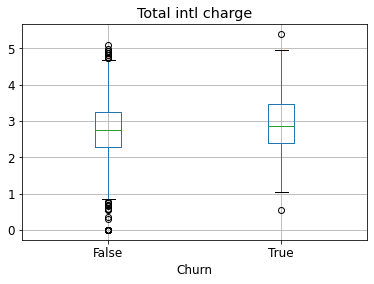

In [131]:
plt.show()
df.boxplot(column='Total intl charge',  by='Churn')
plt.suptitle('')

**Calculating Total no of calls, Total charge**

In [153]:
df["Total charge"] = (df["Total day charge"]+ df["Total eve charge"]+ df["Total night charge"]+ df["Total intl charge"])
df['Total calls'] = (df["Total day calls"]+ df["Total eve calls"]+ df["Total night calls"]+ df["Total intl calls"])
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Total calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,75.56,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,59.24,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,62.29,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,66.80,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,52.09,359


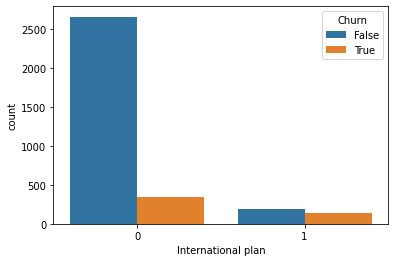

In [154]:
sns.countplot(x="International plan", hue="Churn", data=df)

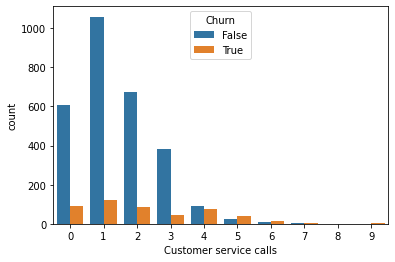

In [157]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)
#plt.figure(figsize=(15,7))

We can see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


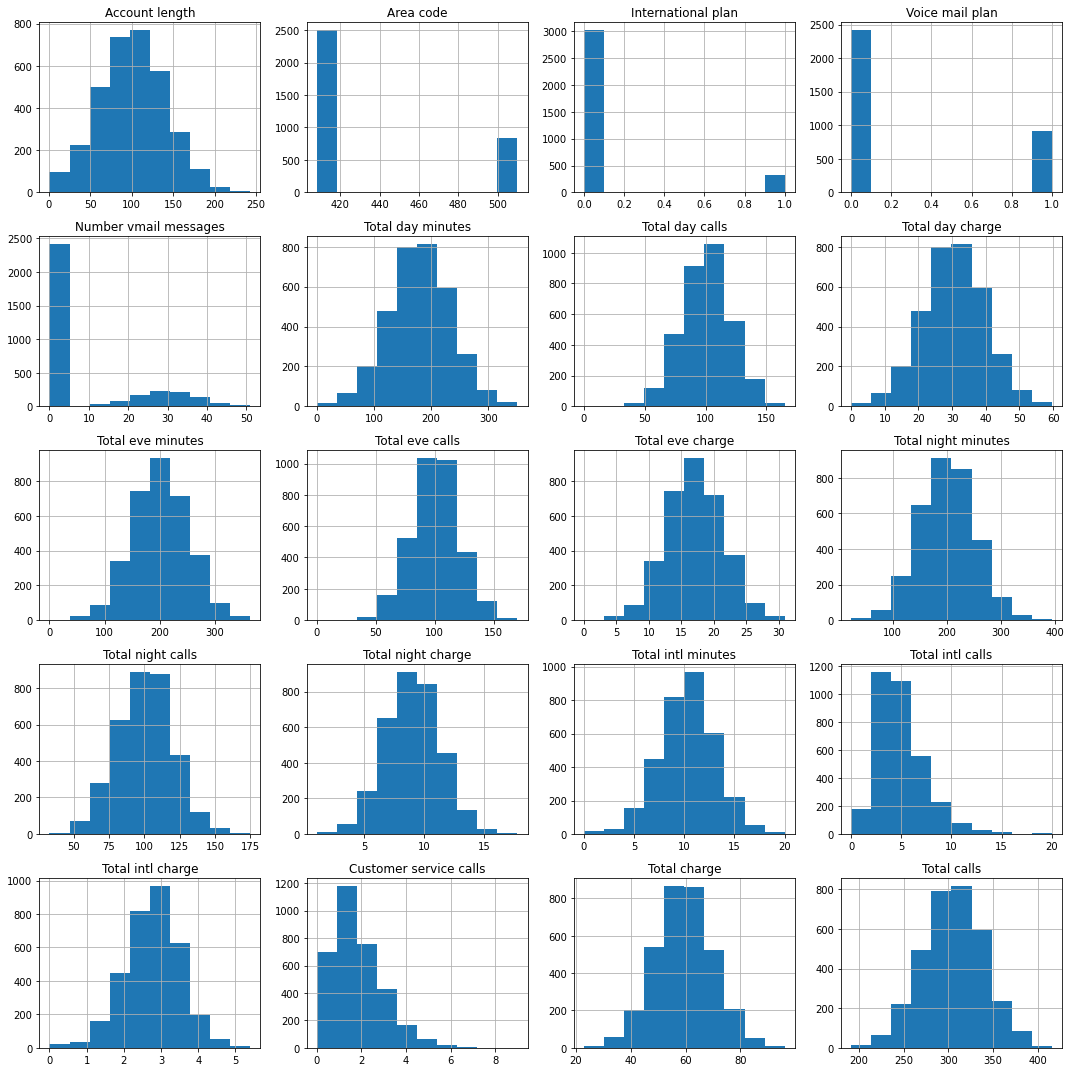

In [158]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout()